In [1]:
# This is all we need to import
from altaipony.lcio import from_mast

# This is for the notebook to show the heatmaps and figures
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
flc = from_mast("GJ 1243", mission="TESS", sector=15, cadence="short")


/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/lightkurve/io/tess.py:34: ResourceWarning: unclosed file <_io.FileIO name='/Users/chris/.lightkurve-cache/mastDownload/TESS/tess2019226182529-s0015-0000000273589987-0151-s/tess2019226182529-s0015-0000000273589987-0151-s_lc.fits' mode='rb' closefd=True>
  lc = read_generic_lightcurve(filename, flux_column=flux_column, time_format="btjd")
1% (232/17981) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (232/17981) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


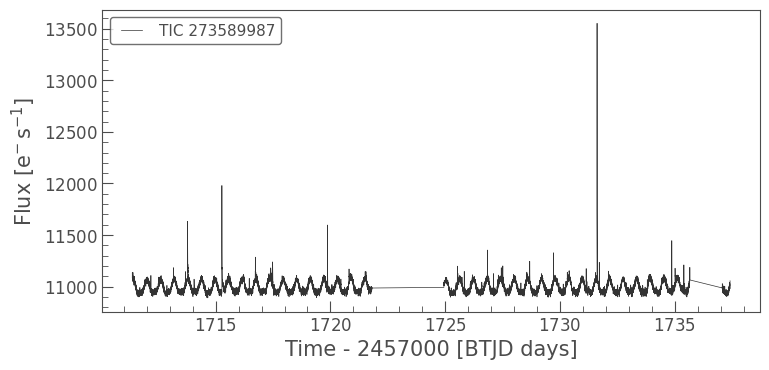

In [3]:
flc.plot();

In [41]:
# We can do all sorts of stuff on this, like de-trending ...
flcd = flc.detrend("savgol")

# ... searching for flares ...
flares = flcd.find_flares().flares

Found 7 candidate(s) in the (0,7412) gap.
Found 8 candidate(s) in the (7412,15015) gap.
Found 0 candidate(s) in the (15015,15264) gap.


In [24]:
print(flares)
print(flares.ampl_rec.max(), flares.ampl_rec.min(), flares.ed_rec.max(), flares.ed_rec.min())

   istart  istop  cstart   cstop       tstart        tstop     ed_rec  \
0    1717   1734  350149  350166  1713.775775  1713.799386  33.524078   
1    2778   2791  351226  351239  1715.271598  1715.289654  37.924774   
2    3810   3820  352276  352286  1716.729921  1716.743809  12.929523   
3    4284   4293  352753  352762  1717.392416  1717.404915   6.960643   
4    4347   4354  352816  352823  1717.479915  1717.489637  11.230215   
5    6069   6074  354540  354545  1719.874340  1719.881285  14.175368   
6    6459   6462  354958  354961  1720.454891  1720.459058   2.784282   
7    7811   7815  358613  358618  1725.531236  1725.538181   6.232915   
8   10038  10041  360882  360885  1728.682575  1728.686741   4.545046   
9   10753  10758  361626  361631  1729.715891  1729.722835   7.545779   
10  12120  12135  362994  363009  1731.615858  1731.636691  70.739856   
11  12191  12194  363065  363068  1731.714468  1731.718634   4.680783   
12  14448  14451  365338  365341  1734.871358  1734

In [90]:
# ... or sampling injection recovery
flcd, fakeflc = flcd.sample_flare_recovery(inject_before_detrending=True, mode="savgol", 
                                          iterations=5, fakefreq=0.1, ampl=[1e-4, 0.02], dur=[.001/6., 0.01/6.])
                                           #ampl=[10,100], dur=[10,100])
                                           #ampl=[flares.ampl_rec.min(), flares.ampl_rec.max()],
                                           #dur=[flares.ed_rec.min(), flares.ed_rec.max()])
                                          #)

Found 7 candidate(s) in the (0,7412) gap.
Found 8 candidate(s) in the (7412,15015) gap.
Found 0 candidate(s) in the (15015,15264) gap.
N/A%|                                                                         |
Detrending fake LC:

Found 10 candidate(s) in the (0,7412) gap.
Found 16 candidate(s) in the (7412,15015) gap.
Found 0 candidate(s) in the (15015,15264) gap.
 20%|##############                                                           |
Detrending fake LC:

Found 10 candidate(s) in the (0,7412) gap.
Found 16 candidate(s) in the (7412,15015) gap.
Found 0 candidate(s) in the (15015,15264) gap.
 40%|#############################                                            |
Detrending fake LC:

Found 10 candidate(s) in the (0,7412) gap.
Found 16 candidate(s) in the (7412,15015) gap.
Found 0 candidate(s) in the (15015,15264) gap.
 60%|###########################################                              |
Detrending fake LC:

Found 10 candidate(s) in the (0,7412) gap.
Found 1

In [91]:
print("Before loading extra events: ", flcd.fake_flares.shape[0])

flcd.load_injrec_data("gj1243_injrec.csv")

print("After loading extra events: ", flcd.fake_flares.shape[0])

The file is appended to an existing table.


Before loading extra events:  1025
After loading extra events:  2035


In [92]:
flcd.fake_flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,duration_d,amplitude,ed_inj,peak_time,ampl_rec,total_n_valid_data_points,rec,dur
0,4201.0,4232.0,352642.0,352674.0,1717.238273,1717.282717,85.479497,0.475419,0.005932,0.169696,79.740080,1717.239423,0.151932,17848.0,1.0,0.044444
1,16882.0,16886.0,366202.0,366206.0,1736.071361,1736.076917,7.360792,0.217770,0.001187,0.149273,8.930096,1736.071812,0.036908,17848.0,1.0,0.005555
2,9585.0,9604.0,358853.0,358872.0,1725.864587,1725.890976,138.600133,0.343837,0.004062,0.437143,143.299631,1725.865817,0.394171,17848.0,1.0,0.026388
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000945,0.036502,1.758385,1715.876418,NaN,NaN,0.0,NaN
4,2454.0,2473.0,350883.0,350902.0,1714.795236,1714.821624,80.909624,0.421482,0.005860,0.194255,88.433608,1714.797440,0.153150,17848.0,1.0,0.026389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,14713.0,14727.0,364021.0,364035.0,1733.042246,1733.061690,89.429561,0.354649,0.003296,0.379053,93.683406,1733.042846,0.220081,17848.0,NaN,NaN
1006,4823.0,4832.0,353265.0,353274.0,1718.103544,1718.116044,57.398895,0.241800,0.002232,0.271493,59.127952,1718.103562,0.260795,17848.0,NaN,NaN
1007,15661.0,15702.0,364980.0,365021.0,1734.374167,1734.431111,210.506604,0.468750,0.006707,0.400687,214.023348,1734.376794,0.373669,17848.0,NaN,NaN
1008,12428.0,12437.0,361736.0,361745.0,1729.868689,1729.881189,21.542339,0.325988,0.003252,0.096883,23.423106,1729.869388,0.061497,17848.0,NaN,NaN


In [93]:
flcd_fake_flares_dropna = flcd.fake_flares.dropna()
print(len(flcd_fake_flares_dropna))

789


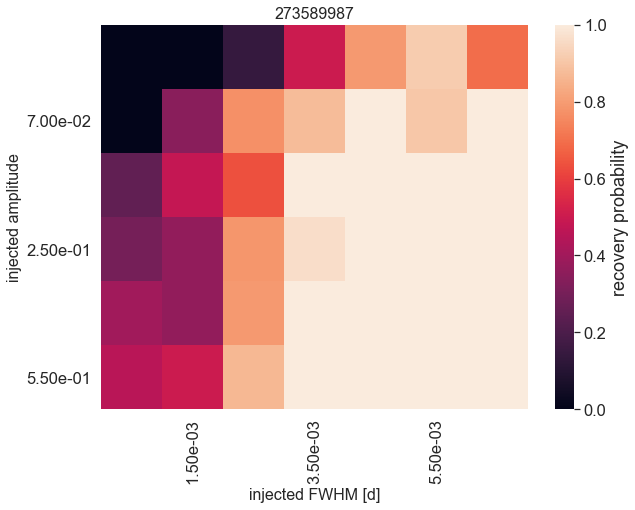

In [95]:
import numpy as np

fig = flcd.plot_recovery_probability_heatmap(ampl_bins=np.array([0, 0.04, .1, .2, .3, .4, .7],),
                                       dur_bins=np.linspace(0.,0.01,11),)

In [101]:
from altaipony.injrecanalysis import tile_up_injection_recovery

# Use "ed_ratio" instead of  "recovery_probability" to access the other table
dff, val = tile_up_injection_recovery(flcd.fake_flares, "recovery_probability",
                                      ampl_bins=np.linspace(0,.1,10),
                                      dur_bins=np.linspace(0,.01,10))

print(dff)

                                  rec  count
Amplitude     Duration                      
(0.0, 0.0111] (0.0, 0.00111]      NaN      0
              (0.00111, 0.00222]  NaN      0
              (0.00222, 0.00333]  0.0      1
              (0.00333, 0.00444]  0.0      2
              (0.00444, 0.00556]  0.0      1
...                               ...    ...
(0.0889, 0.1] (0.00444, 0.00556]  1.0      6
              (0.00556, 0.00667]  1.0      1
              (0.00667, 0.00778]  1.0      2
              (0.00778, 0.00889]  NaN      0
              (0.00889, 0.01]     NaN      0

[81 rows x 2 columns]


In [102]:
print(dff['count'].sum())
print(dff['rec'].mean())


224
0.5995590828924162


In [103]:
# convert back from MultiIndex to single index
dff_rec_single_index = dff['rec'].reset_index(level=['Amplitude','Duration'])
print(dff_rec_single_index)
amp_rec_group = dff_rec_single_index.groupby(['Amplitude']).agg('mean').reset_index()
amp_rec_group['ampl_bin_left'] = amp_rec_group['Amplitude'].apply(lambda x: x.left).astype(float)
amp_rec_group['ampl_bin_right'] = amp_rec_group['Amplitude'].apply(lambda x: x.right).astype(float)
amp_rec_group['ampl_bin_mean'] = 0.5*(amp_rec_group['ampl_bin_left']+amp_rec_group['ampl_bin_right'])
print(amp_rec_group)

dur_rec_group = dff_rec_single_index.groupby(['Duration']).agg('mean').reset_index()
dur_rec_group['dur_bin_left'] = dur_rec_group['Duration'].apply(lambda x: x.left).astype(float)
dur_rec_group['dur_bin_right'] = dur_rec_group['Duration'].apply(lambda x: x.right).astype(float)
dur_rec_group['dur_bin_mean'] = 0.5*(dur_rec_group['dur_bin_left']+dur_rec_group['dur_bin_right'])

        Amplitude            Duration  rec
0   (0.0, 0.0111]      (0.0, 0.00111]  NaN
1   (0.0, 0.0111]  (0.00111, 0.00222]  NaN
2   (0.0, 0.0111]  (0.00222, 0.00333]  0.0
3   (0.0, 0.0111]  (0.00333, 0.00444]  0.0
4   (0.0, 0.0111]  (0.00444, 0.00556]  0.0
..            ...                 ...  ...
76  (0.0889, 0.1]  (0.00444, 0.00556]  1.0
77  (0.0889, 0.1]  (0.00556, 0.00667]  1.0
78  (0.0889, 0.1]  (0.00667, 0.00778]  1.0
79  (0.0889, 0.1]  (0.00778, 0.00889]  NaN
80  (0.0889, 0.1]     (0.00889, 0.01]  NaN

[81 rows x 3 columns]
          Amplitude       rec  ampl_bin_left  ampl_bin_right  ampl_bin_mean
0     (0.0, 0.0111]  0.000000         0.0000          0.0111        0.00555
1  (0.0111, 0.0222]  0.320106         0.0111          0.0222        0.01665
2  (0.0222, 0.0333]  0.564286         0.0222          0.0333        0.02775
3  (0.0333, 0.0444]  0.666667         0.0333          0.0444        0.03885
4  (0.0444, 0.0556]  0.770833         0.0444          0.0556        0.05000
5  (0

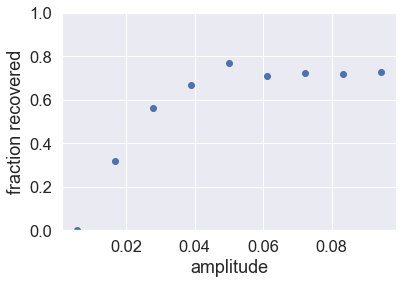

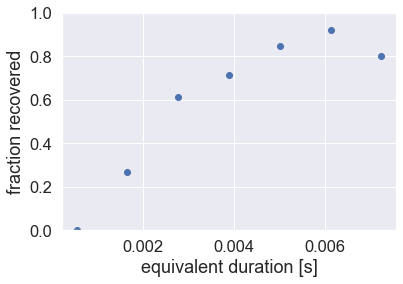

In [104]:
plt.scatter(amp_rec_group['ampl_bin_mean'], amp_rec_group['rec'])
plt.ylim(0,1)
#plt.xlim(ampl_min,ampl_max)
plt.ylabel('fraction recovered')
plt.xlabel('amplitude')
plt.show()

plt.scatter(dur_rec_group['dur_bin_mean'], dur_rec_group['rec'])
plt.ylim(0,1)
#plt.xlim(ed_min,ed_max)
plt.ylabel('fraction recovered')
plt.xlabel('equivalent duration [s]')
plt.show()

In [89]:
print(dur_rec_group['dur_bin_mean'], dur_rec_group['rec'])

0     0.0025
1     0.0075
2     0.0125
3     0.0175
4     0.0225
5     0.0275
6     0.0325
7     0.0375
8     0.0425
9     0.0475
10    0.0525
11    0.0575
12    0.0625
13    0.0675
14    0.0725
15    0.0775
16    0.0825
17    0.0875
18    0.0925
19    0.0975
20    0.1025
21    0.1075
22    0.1125
23    0.1175
24    0.1225
25    0.1275
26    0.1325
27    0.1375
28    0.1425
29    0.1475
30    0.1525
31    0.1575
32    0.1625
33    0.1675
34    0.1725
35    0.1775
36    0.1825
37    0.1875
38    0.1925
Name: dur_bin_mean, dtype: float64 0     0.690733
1     0.976103
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30      

Let's try again

In [63]:
flc = from_mast("TIC 29780677", mode="LC", c=2, mission="TESS")[0]
#print(flc)
flc = flc.detrend("savgol")
flc, fake_flc = flc.sample_flare_recovery(inject_before_detrending=True, mode="savgol",
                                          iterations=50, fakefreq=1, ampl=[1e-4, 0.5],
                                          dur=[.001/6., 0.1/6.])

4% (49/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4% (49/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (17/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (17/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


       time             flux         flux_err       timecorr    cadenceno  ... mom_centr2 mom_centr2_err   pos_corr1      pos_corr2   
                    electron / s   electron / s        d                   ...    pix          pix            pix            pix      
------------------ -------------- -------------- -------------- ---------- ... ---------- -------------- -------------- --------------
 1354.136980723541  7.3776416e+02  1.4744406e+00  9.8598225e-04       6080 ...  466.96182  1.0462491e-03 -1.2018427e-02  2.7715735e-02
1354.1578140203733  7.3825299e+02  1.4746904e+00  9.8595396e-04       6081 ...  466.96238  1.0462051e-03 -1.2846080e-02  2.8702661e-02
 1354.178647318136  7.3590955e+02  1.4743388e+00  9.8592660e-04       6082 ...  466.96296  1.0473505e-03 -1.3832809e-02  2.8716149e-02
1354.1994806168302  7.4077179e+02  1.4752464e+00  9.8590017e-04       6083 ...  466.96146  1.0425854e-03 -1.4017552e-02  2.8307093e-02
1354.2203139163394  7.3973584e+02  1.4746670e+00  9.858

Found 0 candidate(s) in the (0,606) gap.
Found 2 candidate(s) in the (606,1065) gap.
Found 1 candidate(s) in the (1065,1196) gap.
N/A%|                                                                         |
Detrending fake LC:

Found 3 candidate(s) in the (0,606) gap.
Found 6 candidate(s) in the (606,1065) gap.
Found 1 candidate(s) in the (1065,1196) gap.
  2%|#                                                                        |
Detrending fake LC:

Found 2 candidate(s) in the (0,606) gap.
Found 5 candidate(s) in the (606,1065) gap.
Found 1 candidate(s) in the (1065,1196) gap.
  4%|##                                                                       |
Detrending fake LC:

Found 6 candidate(s) in the (0,606) gap.
Found 4 candidate(s) in the (606,1065) gap.
Found 2 candidate(s) in the (1065,1196) gap.
  6%|####                                                                     |
Detrending fake LC:

Found 2 candidate(s) in the (0,606) gap.
Found 4 candidate(s) in the (606,10

 70%|###################################################                      |
Detrending fake LC:

Found 5 candidate(s) in the (0,606) gap.
Found 8 candidate(s) in the (606,1065) gap.
Found 1 candidate(s) in the (1065,1196) gap.
 72%|####################################################                     |
Detrending fake LC:

Found 3 candidate(s) in the (0,606) gap.
Found 5 candidate(s) in the (606,1065) gap.
Found 1 candidate(s) in the (1065,1196) gap.
 74%|######################################################                   |
Detrending fake LC:

Found 2 candidate(s) in the (0,606) gap.
Found 5 candidate(s) in the (606,1065) gap.
Found 2 candidate(s) in the (1065,1196) gap.
 76%|#######################################################                  |
Detrending fake LC:

Found 4 candidate(s) in the (0,606) gap.
Found 3 candidate(s) in the (606,1065) gap.
Found 1 candidate(s) in the (1065,1196) gap.
 78%|########################################################               

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

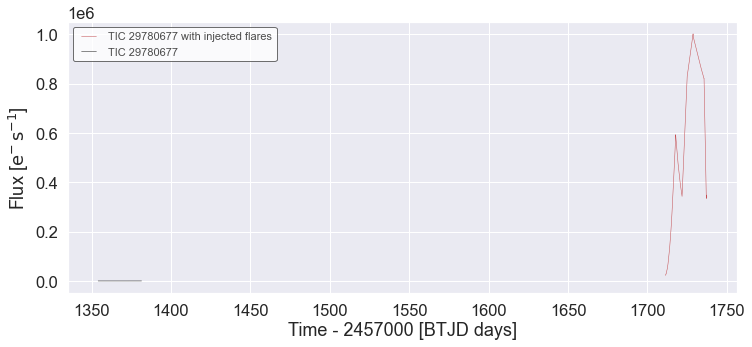

In [65]:
fig, ax = plt.subplots(figsize=(12,5))
fakeflc.plot(ax=ax, c="r", label="TIC 29780677 with injected flares")
flc.plot(ax=ax, c="k")

In [74]:
flc = from_mast("GJ 1243", mode="LC", c=15, mission="TESS")[0]
flc = flc.detrend("savgol")
flc1, fake_flc = flc.sample_flare_recovery(inject_before_detrending=True, mode="savgol",
                                          iterations=500, fakefreq=.01, ampl=[1e-4, 0.5],
                                          dur=[.001/6., 0.1/6.])

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/lightkurve/io/tess.py:34: ResourceWarning: unclosed file <_io.FileIO name='/Users/chris/.lightkurve-cache/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000273589987-s0015_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000273589987-s0015_tess_v1_lc.fits' mode='rb' closefd=True>
  lc = read_generic_lightcurve(filename, flux_column=flux_column, time_format="btjd")
2% (19/1197) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2% (19/1197) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/lightkurve/io/qlp.py:43: ResourceWarning: unclosed file <_io.FileIO name='/Users/chris/.lightkurve-cache/mastDownload/HLSP/hlsp_qlp_tess_ffi_s0015-0000000273589987_tess_v01_llc/hlsp_qlp_tess_ffi_s0015-0000000273589987_tess_v01_llc.fits' mode='rb' closefd=True>
  lc = read_generic_lightcurve(filename, flux_column=flux_colum

ValueError: pos must be nonnegative and less than window_length.

In [76]:
flc1

NameError: name 'flc1' is not defined

In [75]:
fig = flc1.plot_recovery_probability_heatmap(flares_per_bin=.3)
plt.title("GJ 1243");

NameError: name 'flc1' is not defined

In [70]:
flc = flc.characterize_flares(ampl_bins=10, dur_bins=10)

AttributeError: 'DataFrame' object has no attribute 'ampl_rec'

In [71]:
flc.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points,dur
